# Locura de Marzo Bracket Predictions
This notebook will serve as a complete step by step walkthrough of the Locura de Marzo project. 

<b> Dr. Kevin Mentzer</b> <i>Bryant University</i>


<b> Professor Mark Frydenberg</b> <i> Bentley University </i>

<b> Zachary Galante </b> <i> Bryant University </i> 

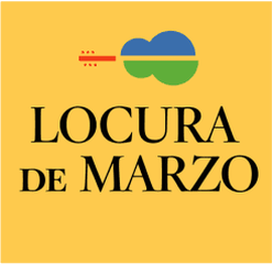

# Locura de Marzo Background
Run by a Michigan middle school Spanish teacher, Locura de Marzo (March Madness) is an online tournament of Spanish songs where students from across the world are able to vote for their favorite songs. The songs are often found on popular platforms such as YouTube and Spotify, allowing for mass exposure. Similar to the March Madness basketball tournament, one week is given to complete each of the four rounds. During this week, students are encouraged to listen to the songs and watch their music videos to then vote for a song in their given matchup. More background on the tournament can be found [here.](http://www.senorashby.com/locura-de-marzo.html)

# Imports

In [1]:
# installing libraries necessary for the modeling and analysis
!pip install spotipy
!pip install tweepy
! pip install --upgrade google-api-python-client
! pip install --upgrade google-auth-oauthlib google-auth-httplib2
!pip install oauth2client
!pip install plotly

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Requirement already up-to-date: google-api-python-client in /usr/local/lib/python3.6/site-packages (2.21.0)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Requirement already up-to-date: google-auth-oauthlib in /usr/local/lib/python3.6/site-packages (0.4.6)
Requirement already up-to-date: google-auth-httplib2 in /usr/local/lib/python3.6/site-packages (0.1.0)


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
# imporing the previously installed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## **IMPORTANT....ENTER API CREDENTIALS!!**
In order for the code in this notebook to run, you must enter your credentials for the Spotify, YouTube and Twitter APIs. These will be used later on in the notebook.

In [ ]:
# Enter credentials here for code to run 
spotify_client_id = 'xxxxxxxxxxxxxxxxxxxxxxx'
spotify_client_secret = 'xxxxxxxxxxxxxxxxxxxxxxx'
Youtube_developer_key = 'xxxxxxxxxxxx'
YOUTUBE_API_SERVICE_NAME = 'xxxxxxxxxxxxxxxx'
twitter_consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxx'
twitter_consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
twitter_access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
twitter_access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

# Data Acquisition
## Spotify Data

### Setting up the Spotify API
In this next section, the Spotify API is being set up to gather data on the songs included in the Locura de Marzo tournament. The API allows for the collection of advanced measures for each song, for example, the loudness and danceability. In the following cell, the function is being set up and printing the names of playlists on Spotify to test the function.

In [3]:
# providing the appropriate API credentials 
auth_manager = spotipy.oauth2.SpotifyClientCredentials(client_id= spotify_client_id, client_secret= spotify_client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)
#tests the spotipy playlist function
playlists = sp.user_playlists('spotify')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s" % (i + 1 + playlists['offset'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 Today's Top Hits
   2 RapCaviar
   3 Hot Country
   4 ¡Viva Latino!
   5 New Music Friday
   6 Peaceful Piano
   7 Are & Be
   8 Rock Classics
   9 mint
  10 Rock This
  11 New Music Friday
  12 just hits
  13 All Out 00s
  14 All Out 90s
  15 All Out 80s
  16 All Out 70s
  17 All Out 60s
  18 All Out 50s
  19 Soft Pop Hits
  20 Signed XOXO
  21 Most Necessary
  22 Gold School
  23 Get Turnt
  24 B.A.E.
  25 African Heat
  26 Mind Right
  27 Dancehall Official
  28 Westside Story
  29 Power Workout
  30 No Cap
  31 State of Mind
  32 Alternative Hip Hop
  33 Workout Twerkout
  34 We Everywhere
  35 Black History Salute
  36 Behind The Lyrics: Hip Hop
  37 New Noise
  38 The New Alt
  39 Rock Solid
  40 Rock This: Best of 2017
  41 Rock Party
  42 You & Me
  43 It's ALT Good!
  44 The Scene
  45 Rock Hard
  46 This Is Ryan Adams
  47 This Is The Black Keys
  48 This Is Tom Petty
  49 This Is Nirvana
  50 This Is Ramones
  51 This Is Green Day
  52 This Is Metallica
  53 This Is Jan

 401 A Poem a Day
 402 Rock & Roots
 403 Interstate Drive Songs
 404 Low Key Revelry
 405 Top Male Artists of 2017: USA
 406 Top Female Artists of 2016 - USA
 407 Spotify Singles: Covers
 408 Best of 2016: Folk & Americana
 409 Best of 2016:  Hot Country
 410 Guest List: Orb
 411 Fangirls Run the World
 412 Black Lives Matter
 413 SXSW: HipHopUpNext
 414 Women of Experimental
 415 Power To The People
 416 Artists Den + Spotify
 417 Women in Music | Stories & Songs
 418 BRILLIANTMINDS2016
 419 Blues & Roots Rock
 420 Irish Folk - Ballads
 421 4th of July Party
 422 Incoming
 423 90s Boy Bands
 424 Chill Hits
 425 Soft Rock
 426 One Love
 427 We Run The World-Cup!
 428 AMY
 429 Follow Your Bliss
 430 Ballads Forever
 431 Calming Acoustic
 432 70s & 80s Acoustic
 433 Rest & Relaxation
 434 One Perfect Day
 435 Backporch Blues
 436 DayDreamer
 437 Wild + Free
 438 Dreamcatcher
 439 Sounds of the Rain Forest
 440 Nightstorms
 441 Gentle Rains
 442 Get Happy!
 443 Lazy Afternoon
 444 Acousti

 801 Front Porch
 802 Americana Icons
 803 Swagger
 804 Bring Back the 2000s
 805 World Folk
 806 Alone on Christmas
 807 Creepy, Stupid, Love
 808 Doo-Wop Dee Doo
 809 Happy Days
 810 Indie One Stop
 811 Your Favorite Coffeehouse
 812 Valentine's Day Love
 813 Beat Down Your Morning
 814 Beast Mode Rock
 815 Legendary
 816 Wicked Wives Wine Party 
 817 The Perfect Italian Dinner
 818 Acid Blues
 819 Summer Heat
 820 Prog Rock Monsters
 821 Fusion Fest
 822 #Hotmess
 823 Chill Folk
 824 Roots Revival
 825 Ultimate Live Jams
 826 Short Stories
 827 Audiobooks
 828 Editor's Choice: Nonfiction
 829 Editor's Choice: Fiction
 830 Margaret Walker
 831 Poems for Spring
 832 A Hipster's Guide to Poetry
 833 A Child's Garden of Verses
 834 La poésie française
 835 Emily Dickinson
 836 Love Poems
 837 Shakespeare: The Poetry
 838 The Selected W. B. Yeats
 839 The Robert Frost Reading Room
 840 Readings from Dylan Thomas
 841 This Is Langston Hughes
 842 The Romantics
 843 Poetry: In Their Own Vo

1201 Top Picks Party
1202 Top Picks Chill
1203 Top Picks Urban
1204 Top Picks Club
1205 Top Picks Country
1206 Top Picks Events
1207 Top Picks Groove
1208 Top Picks Rock
1209 Top Picks Romance
1210 Top Picks Jazz and Blues
1211 Top Picks Travel
1212 Top Picks holiday
1213 Out The Mud
1214 Scenic Route
1215 Peace
1216 Sleep
1217 Christmas Peaceful Piano
1218 A Soft Piano Christmas
1219 Piano in the Background
1220 It's Hits Sweden
1221 Main Stage
1222 Det blir kaoz!
1223 Feel Good Dinner
1224 Truly Deeply House
1225 Girls' Night
1226 Summer House!
1227 An Elegant Affair
1228 Soulful Disco
1229 The Most Romantic Songs in the World
1230 50 Songs Unplugged
1231 50 Great Female Voices
1232 70s Soul Classics
1233 12" Classics
1234 Après Ski Classics
1235 After Work
1236 Autumn Leaves
1237 Autumn Lounge
1238 Best Tracks from Tarantino Films
1239 Britpop, Etc.
1240 Broken Heart
1241 Classical Sleep
1242 Classic Road Trip Songs
1243 Dinner Lounge
1244 Chill Out Music
1245 Comfort Zone
1246 Cool

In [4]:
# The highest ranked song for 2021 is Vida De Rico by Camilo. 
# By will use this song ID to see what data is available to us in regards to each song.
# Import the necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
# Set up a connection using the Spotify API credentials
auth_manager = spotipy.oauth2.SpotifyClientCredentials(client_id= spotify_client_id, client_secret= spotify_client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)
# Songs have metadata associated with them along with audio features. We make a call for each.
meta = sp.track('73nAK3HgQK8dak83Y2WQ8F')
features = sp.audio_features('73nAK3HgQK8dak83Y2WQ8F')
# printing out the meta data and the specific features for the song
print(meta)
print(features)

{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/28gNT5KBp7IjEOQoevXf9N'}, 'href': 'https://api.spotify.com/v1/artists/28gNT5KBp7IjEOQoevXf9N', 'id': '28gNT5KBp7IjEOQoevXf9N', 'name': 'Camilo', 'type': 'artist', 'uri': 'spotify:artist:28gNT5KBp7IjEOQoevXf9N'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MN', 'MO', 'MR', 'MT', '

In [5]:
# continuing to test the spotify functions 
locoplaylist = 'https://open.spotify.com/playlist/5uR6hSLXusr18AERyVmnbE'
offset = 0
response = sp.playlist_items(locoplaylist,
                             offset=offset,
                             fields='items.track.id,items.track.name,total',
                             additional_types=['track'])
print(response['items'])
offset = 0
response = sp.playlist_items(locoplaylist,
                             offset=offset,
                             fields='items.track.id,items.track.name,total',
                             additional_types=['track'])
print(response['items'])

[{'track': {'id': '73nAK3HgQK8dak83Y2WQ8F', 'name': 'Vida de Rico'}}, {'track': {'id': '0GARcbxLIOmzrs0lHpuvmi', 'name': 'Aloha'}}, {'track': {'id': '4N7yGB3c8GXPMEeoc15Ekr', 'name': 'La Lista'}}, {'track': {'id': '02dsc9B5N8BFatjGcGhk1u', 'name': 'Al Aire'}}, {'track': {'id': '1pqnQ41XbfKjaFu6M0eGJp', 'name': 'Agua (with J Balvin) - Music From "Sponge On The Run" Movie'}}, {'track': {'id': '1MXzojJav1N4cREWTFm1iZ', 'name': '+ (MÁS)'}}, {'track': {'id': '0FvChpMwtdapJchQ9ncomB', 'name': 'dos mil veinte'}}, {'track': {'id': '1VVzoh1lweCIE90X4VqyWV', 'name': 'Humano'}}, {'track': {'id': '0ZqhB08GsFc4xfV07AsXzE', 'name': 'Tanto'}}, {'track': {'id': '46HdsiK0uR26B2dY9QPzda', 'name': 'Deja vu'}}, {'track': {'id': '4txQPJDlvU72lC6EMhT7m9', 'name': 'Qué Tienes Tú (feat. Jesús de Reik & Mau y Ricky)'}}, {'track': {'id': '3MrPs3OPX9NHGbRyufa8Ea', 'name': 'Pura Vida'}}, {'track': {'id': '4ST6fVORgY7HfxGlxWIm9B', 'name': 'Vuela'}}, {'track': {'id': '3eSJmGWqoBRx5wbFCtvPtz', 'name': 'Color Esperan

In [6]:
#creating a function to get the trackID
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

### Spotify Track Data
Now that the Spotify API is installed along with the appropriate functions, it can now be used to gather information on each song for each year. The following cell contains the id for each year's playlist. <em>Note that the playlist for the Locotubre playlist is included (id_oct). This was a unique tournament run in October 2020 which featured the best songs from the previous tournaments. Since we already have the necessary data for these songs, this tournament will not be included in our research. <em>

In [7]:
# assigning the playlist id to the variable name
id_oct = '7flePFOJJdH9movvNzwMsF'
id_17 = '6xWcKO4TZZ4f5UMrxGgLkv'
id_18 = '0uhlhWI8qBI1cn9L4Ibrdd'
id_19 = '59D6faNL4KGt2R6Jg6U7F9'
id_20 = '57mPJ0uEewNBk5RXyTQWkc'
id_21 = '5uR6hSLXusr18AERyVmnbE'
# creating a list of all the playlist ids
id_list = [id_oct, id_17, id_18, id_19, id_20, id_21]

In [8]:
# using a loop to get the tracks from the playlist and add then to a list
playlists = []
for ids in id_list:
    playlists.append(getTrackIDs('3kiizy8ug80fzb41x3bdhq931', ids))

In [9]:
# selecting the appropriate list of songs from the 'playlists' variable and assigning them 
playlist_oct = playlists[0]
playlist_17 = playlists[1]
playlist_18 = playlists[2]
playlist_19 = playlists[3]
playlist_20 = playlists[4]
playlist_21 = playlists[5]
playlist_list = [playlist_oct, playlist_17, playlist_18, playlist_19, playlist_20, playlist_21]

### Gathering track features
Now that we have the playlist containing the song ids for each year, we can begin to gather information for each song. The first step of this is shown below by creating the <em> getTrackFeatures </em> function.

In [10]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

  # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    mode = features[0]['mode']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, key, mode, time_signature]
    return track

### getTrackFeatures test

To begin, let's test our credentials by making a call to pull information about a single song. 

The highest ranked song for 2021 is Vida De Rico by Camilo. By searching for this song on Spotify we can see that the song ID is '73nAK3HgQK8dak83Y2WQ8'. We will call the track method passing in this song ID to see what data is available to us in regards to each song.


In [11]:
# showing the data available to be gathered for each song
sample_features = getTrackFeatures('73nAK3HgQK8dak83Y2WQ8F')

In [12]:
# creating a list of the column headers for the DataFrame
track_head = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability',
         'acousticness', 'energy', 'instrumentalness', 'liveness', 
         'loudness', 'speechiness', 'tempo', 'key', 'mode', 'time_signature']

In [13]:
# creating the sample DataFrame to show the features that can be acquired from the API 
sample_dataframe = pd.DataFrame(sample_features)
sample_dataframe = sample_dataframe.T
sample_dataframe.columns = track_head
sample_dataframe

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,mode,time_signature
0,Vida de Rico,Vida de Rico,Camilo,2020-09-21,187426,77,0.824,0.167,0.457,0,0.041,-5.428,0.0543,87.977,6,1,4


Now that we understand the data that can be acquired for each song, a DataFrame similar to the one above is created for each playlist.

In [14]:
playlist17_features = []
for i in range(len(playlist_17)):
    track = getTrackFeatures(playlist_17[i])
    playlist17_features.append(track)

df_17 = pd.DataFrame(playlist17_features, columns = track_head)

In [15]:
playlist18_features = []
for i in range(len(playlist_18)):
    track = getTrackFeatures(playlist_18[i])
    playlist18_features.append(track)

df_18 = pd.DataFrame(playlist18_features, columns = track_head)

In [16]:
playlist19_features = []
for i in range(len(playlist_19)):
    track = getTrackFeatures(playlist_19[i])
    playlist19_features.append(track)

df_19 = pd.DataFrame(playlist19_features, columns = track_head)

In [17]:
playlist20_features = []
for i in range(len(playlist_20)):
    track = getTrackFeatures(playlist_20[i])
    playlist20_features.append(track)

df_20 = pd.DataFrame(playlist20_features, columns = track_head)
df_20 = df_20.drop(df_20.index[[2,3]])
df_20 = df_20.reset_index()

In [18]:
playlist21_features = []
for i in range(len(playlist_21)):
    track = getTrackFeatures(playlist_21[i])
    playlist21_features.append(track)

spotify_21 = pd.DataFrame(playlist21_features, columns = track_head)

The following function is being created for data cleaning and to allow results to be read more easily.

In [19]:
def black_keys(x):
    if (x['key'] == 0 and x['mode'] == 1) or  (x['key'] == 9 and x['mode'] == 0): 
        return 0 
    elif (((x['key'] == 1 or x['key'] == 6) or x['key'] == 11) and x['mode'] == 1) or (((x['key'] == 3 or x['key'] == 8) or x['key'] == 10) and x['mode'] == 0): 
        return 5
    elif ((x['key'] == 2 or x['key'] == 10) and x['mode'] == 1) or ((x['key'] == 7 or x['key'] == 11) and x['mode'] == 0): 
        return 2
    elif ((x['key'] == 3 or x['key'] == 9) and x['mode'] == 1) or ((x['key'] == 0 or x['key'] == 6) and x['mode'] == 0): 
        return 3
    elif ((x['key'] == 4 or x['key'] == 8) and x['mode'] == 1) or ((x['key'] == 1 or x['key'] == 5) and x['mode'] == 0): 
        return 4 
    elif ((x['key'] == 5 or x['key'] == 7) and x['mode'] == 1) or ((x['key'] == 4 or x['key'] == 2) and x['mode'] == 0): 
        return 1

In [20]:
# combining the previously created DataFrame to one
df_list = [df_17, df_18, df_19, df_20]
for x in df_list:
    x['minutes']= x.length/60000
    x['seed'] = x.index + 1
    x['year'] = pd.DatetimeIndex(x['release_date']).year
    x['sharp'] = x.apply(black_keys, axis=1)

## Past Locura de Marzo results
Now that the Spotify data on the songs has been collected, the next part of the data acquisition process is to get the results of how the songs performed in the previous tournaments. The data is being entered manually to ensure the data is in the correct format. Another way this data could be collected is through a web scraper, but with the limited amount of data it was quicker to enter it manually.

In [21]:
data= [
#2017
    ['Vivir Mi Vida', 'Marc Anthony', '@marcanthony', '2017', 1, 1, 1, 1, 0,0.83],
    ['Soy Yo', 'Bomba Estereo', '@bombaestereo', '2017', 2, 1, 0, 0, 0, 0.79],
    ['La Gozadera', 'Gente De Zona', '@GdZOficial', '2017', 3, 1, 1, 0, 0, 0.62],
    ['El Mismo Sol', 'Alvaro Soler', '@asolermusic', '2017', 4, 1, 1, 0, 0, 0.65],
    ['El Perdon', 'Nicky Jam, Enrique Iglesias', '@NickyJamPR, @enriqueiglesias', '2017', 5, 1, 0, 0, 0, 0.63],
    ['Stand By Me', 'Prince Royce', '@PrinceRoyce', '2017', 6, 1, 0, 0, 0, 0.66],
    ['Waka Waka', 'Shakira', '@shakira', '2017', 7, 1, 1, 1, 1, 0.67],
    ['Limbo', 'Daddy Yankee', '@daddy_yankee','2017', 8, 1, 0, 0, 0,0.63],
    ['Creo En Mi', 'Natalia Jimenez', '@NataliaJimenez','2017', 9, 0, 0, 0, 0, 0.37],
    ['Carnaval', 'Maluma', '@maluma', '2017', 10, 0, 0, 0, 0, 0.33],
    ['Picky', 'Joey Montana', '@JoeyMontanaT', '2017', 11, 0, 0, 0, 0, 0.34],
    ["""Echa Pa'lla""", 'Pitbull', '@pitbull', '2017', 12, 0, 0, 0, 0, 0.37],
    ['Caótica Belleza', 'Esteman', '@estemanmusic', '2017', 13, 0, 0, 0, 0, 0.35],
    ['Tengo Tu Love', 'Sie7e', '@Sie7emusic','2017', 14, 0, 0, 0, 0, 0.38],
    ['Eres Para Mi', 'Julieta Venegas', '@julietav', '2017', 15, 0, 0, 0, 0, 0.21],
    ['Mi Primer Millón', 'Bacilos', '@Losbacilos', '2017', 16, 0, 0, 0, 0, 0.17],
#2018
    ['Mi Gente', 'J. Balvin', '@JBALVIN','2018', 1, 1, 1, 0, 0, 0.66],
    ['Internacionales', 'Bomba Estereo', '@bombaestereo','2018', 2, 1, 0, 0, 0, 0.77],
    ['Volar', 'Alvaro Soler', '@asolermusic','2018', 3, 0, 0, 0, 0, 0.32], 
    ['Andas En Mi Cabeza', 'Chino y Nacho', '@ChinoyNacho','2018', 4, 1, 1, 1, 0, 0.72],
    ['Yo Contigo, Tú Conmigo', 'Morat, Alvaro Soler', '@MoratBanda, @asolermusic', '2018', 5, 1, 0, 0, 0, 0.64],
    ['Cuando Te Veo', 'ChocQuibTown', '@chocquibtown', '2018', 6, 0, 0, 0, 0, 0.28],
    ['No Soy Como Crees', 'Ana Mena', '@AnaMenaMusic','2018', 7, 0, 0, 0, 0, 0.42],
    ['La Tierra Olvido', 'Fanny Lu, Fonseca, Maluma, Carlos Vives', '@maluma, @carlosvives','2018', 8, 0, 0, 0, 0, 0.29],
    ['La Bicicleta', 'Shakira', '@shakira', '2018', 9, 1, 0, 0, 0, 0.71],
    ['Voy Ganao', 'Systema Solar', '@systema_solar','2018', 10, 1, 1, 0, 0, 0.58],
    ['Aprender A Quererte', 'Morat', '@MoratBanda','2018', 11, 1, 0, 0, 0, 0.72],
    ['Brindo Por Ti', 'Macaco', '@MacacoMusic', '2018', 12, 0, 0, 0, 0, 0.36],
    ['Prueba De Amor', 'Sie7e', '@Sie7emusic','2018', 13, 0, 0, 0, 0, 0.28],
    ['Robarte Un Beso', 'Carlos Vives', '@carlosvives','2018', 14, 1, 1, 1, 1, 0.68],
    ['Chicas De Revista', 'Beatriz Luengo', '@EsBeatrizLuengo','2018', 15, 0, 0, 0, 0, 0.23],
    ['Baila', 'Esteman', '@estemanmusic','2018', 16, 0, 0, 0, 0, 0.34],
#2019
    ['Échame La Culpa', 'Demi Lovato, Luis Fonsi', '@ddlovato, @LuisFonsi','2019', 1, 1, 1, 0, 0, 0.65],
    ['Cásate Conmigo', 'Nicky Jam, Silvestre Dangond', '@NickyJamPR, @SilvestreFDC','2019', 2, 1, 1, 0, 0, 0.51],
    ['Almost Liking Praying', 'Lin Manuel Miranda, Artists for Puerto Rico', '@Lin_Manuel','2019', 3, 0, 0, 0, 0, 0.45],
    ['Love', 'Sebastian Yatra', '@SebastianYatra','2019', 4, 1, 1, 1, 0, 0.80],
    ['Besos En Guerra', 'Morat, Juanes', '@MoratBanda, @juanes','2019', 5, 1, 0, 0, 0, 0.64],
    ['Puebla', 'Alvaro Soler', '@asolermusic','2019', 6, 0, 0, 0, 0, 0.45],
    ['Toc Toc', 'Macaco', '@MacacoMusic','2019', 7, 1, 0, 0, 0, 0.59],
    ['No Tengo Dinero', 'Maffio', 'unknown','2019', 8, 0, 0, 0, 0, 0.42],
    ['Madre Tierra', 'Chayanne', '@CHAYANNEMUSIC','2019', 9, 1, 0, 0, 0, 0.58],
    ['To My Love', 'Bomba Estereo', '@bombaestereo','2019', 10, 0, 0, 0, 0, 0.41],
    ['Quédate Conmigo', 'Chyno Miranda, Wisin, Gente De Zona', '@CHYNO_Miranda, @GenteDeZonaUIO','2019', 11, 1, 0, 0, 0, 0.55],
    ['Me Gusta', 'Cocoa Roots', 'unknown', '2019', 12, 0, 0, 0, 0, 0.36],
    ['30 de Febrero', 'Ha Ash', '@haashoficial', '2019', 13, 0, 0, 0, 0, 0.20],
    ['Lo Mismo', 'Alvaro Soler, Maitre Gims', '@asolermusic, @GIMS','2019', 14, 1, 1, 1, 1, 0.55],
    ['La La La', 'Shakira', '@shakira','2019', 15, 0, 0, 0, 0, 0.49],
    ['Tan Fácil', 'Cnco', '@CNCOmusic', '2019', 16, 0, 0, 0, 0, 0.35],
#2020
    ['Un Año', 'Sebastian Yatra, Reik', '@SebastianYatra','2020', 1, 1, 1, 1, 0, 0.76],
    ['Cuando Nadie Ve', 'Morat', '@MoratBanda','2020', 2, 1, 1, 0, 0, 0.80],
    ['La Libertad', 'Alvaro Soler', '@asolermusic','2020', 3, 1, 1, 1, 1, 0.80],
    ['Si Tú La Ves', 'Nicky Jam, Wisin', '@NickyJamPR','2020', 4, 0, 0, 0, 0, 0.39],
    ['Llegaste Tú', 'CNCO, Prince Royce', '@CNCOmusic, @PrinceRoyce','2020', 5, 1, 0, 0, 0, 0.62],
    ['Kitipun', 'Juan Luis Guerra', '@JuanLuisGuerra','2020', 6, 0, 0, 0, 0, 0.37],
    ['La Plata', 'Juanes, Lalo Ebratt', '@juanes','2020', 7, 0, 0, 0, 0, 0.33],
    ['Tutu', 'Pedro Capo, Camilo', '@pedrocapo, @CamiloMusica','2020', 8, 1, 0, 0, 0, 0.51],
    ['100 Años', 'Prince Royce, Ha-Ash', '@PrinceRoyce, @haashoficial', '2020', 9, 0, 0, 0, 0, 0.49],
    ['Aleluya', 'Reik, Manuel Turizo', '@ManuelTurizoMTZ','2020', 10, 1, 0, 0, 0, 0.67],
    ['Swing', 'Danny Ocean', '@Dannocean','2020', 11, 1, 0, 0, 0, 0.63],
    ['De Ellos Aprendí', 'David Rees', '@davidreesm','2020', 12, 0, 0, 0, 0, 0.38],
    ['Somos Los Prietos', 'ChocQuibTown', '@chocquibtown','2020', 13, 1, 1, 0, 0, 0.61],
    ['Teléfono', 'Aitana', '@Aitanax','2020', 14, 0, 0, 0, 0, 0.20],
    ['Un Poquito', 'Carlos Vives, Diego Torres', '@carlosvives, @diegotorres','2020', 15, 0, 0, 0, 0, 0.20],
    ['Me Equivoqué', 'Ventino', '@Ventinoficial', '2020', 16, 0, 0, 0, 0, 0.24]]
    
    

Next, a similar DataFrame is being created for the 2021 Locura de Marzo tournament. At the time of creating this model, the songs for the tournament were announced, but the tournament was on going. Therefore, the features that indicate the results for a certain round will all be left as 'N/A', and this DataFrame can be thought of as the test set for the model after it is trained.

In [22]:
#2021
test_set = [['Vida de Rico' , 'Camilo' , '@CamiloMusica', '2021', 1, 'N/A', 'N/A','N/A', 'N/A'],
    ['La Bella y la Bestia', "Morat, Reik", '@MoratBanda', '2021', 2, 'N/A', 'N/A', 'N/A', 'N/A'],
    ['Tanto', 'Jesse Y Joy, Luis Fonsi', '@jesseyjoy', '2021', 3, 'N/A','N/A','N/A'],
    ['Humano', 'Chocquibtown', '@chocquibtown', '2021', 4, 'N/A', 'N/A', 'N/A', 'N/A'],
    ['Agua (with J Balvin) - Music From "Sponge On The Run" Movie', 'J Balvin, Tainy', '@JBALVIN', '2021', 5, 'N/A', 'N/A', 'N/A', 'N/A'],
    ['Pura Vida', 'Don Omar' , '@DONOMAR', '2021' , 6 , 'N/A', 'N/A','N/A','N/A'],
    ['Vuela', 'Macaco, Koers', '@MacacoMusic', '2021', 7, 'N/A', 'N/A', 'N/A', 'N/A'], 
    ['Al Aire', 'Morat', '@MoratBanda', '2021', 8,  'N/A', 'N/A', 'N/A', 'N/A'],
    ['La Lista', 'Aldrey', '@AldreyColombia', '2021', 9, 'N/A', 'N/A', 'N/A', 'N/A'],
    ['Color Esperanza 2020', 'Various Artists', '@rubenblades', '2021', 10, 'N/A', 'N/A', 'N/A', 'N/A'],
    ['Qué Tienes Tú (feat. Jesús de Reik & Mau y Ricky)', 'Dvicio', '@dvicioficial' , '2021', 11, 'N/A', 'N/A', 'N/A', 'N/A'  ],
    ['+ (MÁS)', 'Aitana, Cali Y El Dandee', '@Aitanax', '2021', 12, 'N/A', 'N/A', 'N/A', 'N/A'],
    ['dos mil veinte', 'David Rees', '@iamdavidrees', '2021', 13, 'N/A', 'N/A', 'N/A', 'N/A'],
    ['Deja vu', 'Prince Royce', '@PrinceRoyce', '2021', 14, 'N/A', 'N/A', 'N/A', 'N/A'],
    ['Cun Cun Prá', 'Cimafunk', '@CimafunkOficial', '2021', 15, 'N/A', 'N/A', 'N/A', 'N/A' ],
    ['Aloha', 'Bomba Estereo, Carlos Sadness', '@bombaestereo', '2021', 16, 'N/A', 'N/A', 'N/A', 'N/A']]

## Combining Data

At this point in the project, we now have data from two different sources, the Spotify API and the Locura de Marzo website. We now have to combine this data from both sources into a DataFrame.

### Creating the 2021 Dataframe

The first DataFrame being created is taking the data from the 2021 tournament and combining it with the Spotify information for each song.

In [23]:
# combining the past results and Spotify data from 2021 to form one
df_2021_results = pd.DataFrame(test_set, columns   = ['Song', 'Artist', 'Twitter_Handles','CYear', 'seed', 'R1', 'R2', 'R3', 'R4'])
# rename the 'name' column to allow the two dataframes to be merged
spotify_21.rename(columns = {'name': "Song"}, inplace = True )
locura_de_marzo21= pd.merge(spotify_21, df_2021_results, on= 'Song', how = 'left')

### DataFrame with all past data 
Next, all the data collected from the previous year's tournaments and the spotify data collected for each of the songs is being combined. This is similar to what is occuring in the part above, but above it is combining the data from <b>JUST</b> the 2021 tournament whereas in this DataFrame, it is combining the data from <b>ALL PREVIOUS</b> tournaments. 

In [24]:
# the DataFrame with the manually inputted data from the previous year's results 
past_results = pd.DataFrame(data, columns = ['Song', 'Artist', 'Twitter_Handles','CYear', 'seed', 'R1', 'R2', 'R3', 'R4', 'vote_percentage'])
# creating a list with the spotify DataFrames and merging them into one dataframe
past_spotify_data = [df_17, df_18, df_19, df_20]
spotify_data = pd.concat(past_spotify_data)
# changing the name of a feature to be joined on later 
spotify_data.rename({'name': 'Song'}, axis=1, inplace=True)

This function is being created to fix some of the names from the Spotify data. For example, when song names are obtained through the Spotify API, they can sometimes include extra information such as features on the song. 
* <b>For Example</b>


* <b> Spotify API: </b> "Agua (with J Balvin) - Music From "Sponge On The Run" Movie"


* <b> Manually entered data from previous years: </b> "Agua"

This function will take all names from the Spotify data and ensure they are in the proper form so the DataFrames can then be joined together properly.

In [25]:
def name_change(names):
    for x in range(0,len(names)):
        if names[x] == '(':
            title = names[0:x-1]
            break
        else:
            title = names
    return title

In [26]:
# applying the "name_change" function and changing the names to the proper types
for y in range(0,len(spotify_data)):
    song_name = name_change(spotify_data.iloc[y]['Song'])
    spotify_data['Song'] = spotify_data.replace(['Song'],song_name)
SongTitle = past_results['Song'].tolist()
spotify_data['Song'] = SongTitle

In [27]:
# creating one DataFrame with both the Spotify info and the results from the previous years 
all_past_data = pd.merge(spotify_data, past_results, on= 'Song', how = 'left')

## YouTube Data
In addition to listening to the songs on Spotify, participants could also watch the music videos for each song on YouTube. Similar to the Spotify API, data for each YouTube video can also be collected. 

In [28]:
# setting up the YouTube api with the appropriate credentials 
DEVELOPER_KEY = Youtube_developer_key
YOUTUBE_API_VERSION = "v3"
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,developerKey=DEVELOPER_KEY)

## YouTube API Test

Here, we are testing the YouTube API to get data for the music video of the 1 seed song, Vida de Rico. As shown by the output of the cell, it displays the total number of views for the video. 

In [29]:
vid_request = youtube.videos().list(
        part="statistics, snippet",
        id='qKp1f7Vn9dM')

vid_response = vid_request.execute()

print(f'Total Number of Views: {vid_response["items"][0]["statistics"]["viewCount"]}')


Total Number of Views: 634743047


## Past Years YouTube data
Now that the YouTube API has been loaded and set up appropriately with the required credentials, a playlist containing the music videos for all past Locura de Marzo tournaments is being used. Similar to the way data was retreaved in the previous cell, the YouTube API will acquire additonal data for each song in the playlist. This playlist was created by Brenna Rojek, and can be found [here.](https://www.youtube.com/playlist?list=PLb20jyPU4N30DbYPyUAC2ZB6bIoWYq1xB)

In [30]:
playlist_id = 'PLb20jyPU4N30DbYPyUAC2ZB6bIoWYq1xB'

videos = []

nextPageToken = None
while True:
    pl_request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50,
        pageToken=nextPageToken
    )

    pl_response = pl_request.execute()

    vid_ids = []
    for item in pl_response['items']:
        vid_ids.append(item['contentDetails']['videoId'])

    vid_request = youtube.videos().list(
        part="statistics, snippet",
        id=','.join(vid_ids)
    )
    stats = youtube.videos().list(
                part='statistics, snippet',
                id=','.join(vid_ids)).execute()

    vid_response = vid_request.execute()

    for item in vid_response['items']:
        title= item['snippet']['title']
        favoriteCount= item['statistics']['favoriteCount']
        viewCount= item['statistics']['viewCount']
        channelId= item['snippet']['channelId']
        channelTitle= item['snippet']['channelTitle']
        categoryId= item['snippet']['categoryId']
        
        try:
            likeCount= item['statistics']['likeCount']
        except:
            likeCount= ("Not available")
        try:
            dislikeCount= item['statistics']['dislikeCount']     
        except:
            dislikeCount= ("Not available")

        if 'commentCount' in stats['items'][0]['statistics'].keys():
            commentCount= item['statistics']['commentCount']
        else:
            commentCount= 0
            
        if 'tags' in stats['items'][0]['snippet'].keys():
            tags= item['snippet']['tags']
        else:
            tags= ("No Tags")
        vid_id = item['id']
        yt_link = f'https://youtu.be/{vid_id}'
        videos.append(
            {
                'title':title,
                'vidId':vid_id,
                'url': yt_link,
                'favoriteCount': favoriteCount,
                'viewCount': viewCount,
                'likeCount': likeCount,
                'dislikeCount': dislikeCount,
                'commentCount': commentCount,
                'channelId': channelId,
                'channelTitle': channelTitle,
                'tags': tags,
                'categoryId': categoryId
            }
        )

    nextPageToken = pl_response.get('nextPageToken')

    if not nextPageToken:
        break

Now that YouTube data has been acquired for each song, it is then put into a DataFrame which is then joined back to the main DataFrame containing the results from previous Locura de Marzo tournaments, similar to the style in which the Spotify data was merged.

In [31]:
# creating the YouTube DataFrame with all past results from the created playlist
YTdata_past = pd.DataFrame(videos,columns=['title', 'vidId', 'url', 'favoriteCount', 'viewCount', 'likeCount', 'dislikeCount', 
                                  'commentCount', 'channelId', 'channelTitle', 'tags', 'categoryId'])
complete_past_data = all_past_data.merge(YTdata_past, left_index=True, right_index=True)

## 2021 YouTube Data
Very similar to the previous process, the YouTube data is being collected for the 2021 Locura de Marzo tournament. This time, another YouTube playlist has been created for all songs in the tournament. The full YouTube playlist can be found [here.](https://www.youtube.com/playlist?list=PLfUU-8veyibXxQfNKobff1PqJ9Opkcum2)

In [32]:
playlist_id = 'PLfUU-8veyibXxQfNKobff1PqJ9Opkcum2'

videos = []

nextPageToken = None
while True:
    pl_request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50,
        pageToken=nextPageToken
    )

    pl_response = pl_request.execute()

    vid_ids = []
    for item in pl_response['items']:
        vid_ids.append(item['contentDetails']['videoId'])

    vid_request = youtube.videos().list(
        part="statistics, snippet",
        id=','.join(vid_ids)
    )
    stats = youtube.videos().list(
                part='statistics, snippet',
                id=','.join(vid_ids)).execute()

    vid_response = vid_request.execute()

    for item in vid_response['items']:
        title= item['snippet']['title']
        favoriteCount= item['statistics']['favoriteCount']
        viewCount= item['statistics']['viewCount']
        channelId= item['snippet']['channelId']
        channelTitle= item['snippet']['channelTitle']
        categoryId= item['snippet']['categoryId']
        
        try:
            likeCount= item['statistics']['likeCount']
        except:
            likeCount= ("Not available")

        try:
            dislikeCount= item['statistics']['dislikeCount']     
        except:
            dislikeCount= ("Not available")

        if 'commentCount' in stats['items'][0]['statistics'].keys():
            commentCount= item['statistics']['commentCount']
        else:
            commentCount= 0
            
        if 'tags' in stats['items'][0]['snippet'].keys():
            tags= item['snippet']['tags']
        else:
            #I'm not a fan of empty fields
            tags= ("No Tags")
          

        vid_id = item['id']
        yt_link = f'https://youtu.be/{vid_id}'

        videos.append(
            {
                'title':title,
                'vidId':vid_id,
                'url': yt_link,
                'favoriteCount': favoriteCount,
                'viewCount': viewCount,
                'likeCount': likeCount,
                'dislikeCount': dislikeCount,
                'commentCount': commentCount,
                'channelId': channelId,
                'channelTitle': channelTitle,
                'tags': tags,
                'categoryId': categoryId
            }
        )

    nextPageToken = pl_response.get('nextPageToken')

    if not nextPageToken:
        break

In [33]:
# creating the DataFrame, very similar to the previous section but for only this year's videos
YTdata2021 = pd.DataFrame(videos,columns=['title', 'vidId', 'url', 'favoriteCount', 'viewCount', 'likeCount', 'dislikeCount', 
                                  'commentCount', 'channelId', 'channelTitle', 'tags', 'categoryId'])

In [34]:
training_df_21 = locura_de_marzo21.merge(YTdata2021, left_index=True, right_index=True)

# Twitter Data
In addition to all of the data already collected on the songs, data about the artist's twitter accounts can be collected through the Twitter API. A similar process of collecting the data for the previous year's tournaments first followed by the 2021 tournament will be followed. In addition, to ensure that the API is working correctly, the number of followers for the twitter handle '@CamiloMusica' is being printed.

In [35]:
import tweepy 
# assign the values accordingly
consumer_key =  twitter_consumer_key
consumer_secret = twitter_consumer_secret
access_token = twitter_access_token
access_token_secret = twitter_access_token_secret
# authorization of consumer key and consumer secret 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# set access to user's access key and access secret  
auth.set_access_token(access_token, access_token_secret) 
# calling the api  
api = tweepy.API(auth)
print(f'Number of followers: {api.get_user("@CamiloMusica").followers_count}')


Number of followers: 1515815


## Past Year's Twitter Data

Now having the Twitter API setup, we can now begin to collect twitter data about the previous year's artists.

In [36]:
users = complete_past_data.Twitter_Handles
count= []
import re
for username in users:
    screen_name = username
    if screen_name.find(',')!= -1:
        list = re.split('; |, ', screen_name)
        for item in list:
            user = api.get_user(item) 
            followers_count = user.followers_count
            new= []
            new.append(followers_count)
        number= max(new)
        count.append(number)
    else:
        user = api.get_user(screen_name) 
        followers_count = user.followers_count
        count.append(followers_count)

complete_past_data['followers']= count

# 2021 Twitter Data
Now collecting data on the number of followers for each artist from 2021. The twitter API is able to collect much more data than just the number of followers, but for this analysis it will be the only feature that is focussed on. 

In [37]:
users = training_df_21.Twitter_Handles
count= []
import re
for username in users:
    screen_name = username
    if screen_name.find(',')!= -1:
        list = re.split('; |, ', screen_name)
        for item in list:
            user = api.get_user(item) 
            followers_count = user.followers_count
            new= []
            new.append(followers_count)
        number= max(new)
        count.append(number)
    else:
        user = api.get_user(screen_name) 
        followers_count = user.followers_count
        count.append(followers_count)

training_df_21['followers'] = count

In [38]:
# setting the pandas option to display all columns 
pd.set_option('display.max_columns', None)

In [39]:
complete_past_data.drop(columns = ['index'], inplace = True)

# Final DataFrames before modeling
Now that all of the data aquisition has been completed, the data can now be used for the bracket prediction phase

In [40]:
# showing the two DataFrames
display(complete_past_data.head(1))
display(training_df_21.head(1))

,Song,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,mode,time_signature,minutes,seed_x,year,sharp,Artist,Twitter_Handles,CYear,seed_y,R1,R2,R3,R4,vote_percentage,title,vidId,url,favoriteCount,viewCount,likeCount,dislikeCount,commentCount,channelId,channelTitle,tags,categoryId,followers
0,Vivir Mi Vida,3.0,Marc Anthony,2013-07-23,252346,74,0.656,0.345,0.877,0.0,0.349,-3.231,0.0342,105.018,0,0,4,4.205767,1,2013,3,Marc Anthony,@marcanthony,2017,1,1,1,1,0,0.83,Marc Anthony - Vivir Mi Vida (Official Video),YXnjy5YlDwk,https://youtu.be/YXnjy5YlDwk,0,1035843906,2672637,201209,81469,UCQhOf1GhzkMsyLAFwrnG8XQ,marcanthonyVEVO,"[valio la pena, con letra, 3.0, vivir mi vida ...",10,11294605


,Song,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,mode,time_signature,Artist,Twitter_Handles,CYear,seed,R1,R2,R3,R4,title,vidId,url,favoriteCount,viewCount,likeCount,dislikeCount,commentCount,channelId,channelTitle,tags,categoryId,followers
0,Vida de Rico,Vida de Rico,Camilo,2020-09-21,187426,77,0.824,0.167,0.457,0.0,0.041,-5.428,0.0543,87.977,6,1,4,Camilo,@CamiloMusica,2021,1,N/A,N/A,N/A,N/A,Camilo - Vida de Rico (Official Video),qKp1f7Vn9dM,https://youtu.be/qKp1f7Vn9dM,0,634743047,5194700,313583,148888,UCXQIVincj_W4CYfWKB1iPVQ,CamiloVEVO,"[camilo 2020, vida de rico camilo, camilo vida...",10,1515815


# Machine Learning Model (Predicting total number of votes)

## EDA 

In [41]:
print(f'DataFrame with all past results includes: {complete_past_data.shape[0]} rows (and unique songs) and {complete_past_data.shape[1]} columns')
print('*' * 100)
print(f'DataFrame with the 2021 results includes: {training_df_21.shape[0]} rows (and unique songs) and {training_df_21.shape[1]} columns')

DataFrame with all past results includes: 64 rows (and unique songs) and 43 columns
****************************************************************************************************
DataFrame with the 2021 results includes: 16 rows (and unique songs) and 38 columns


## Spotify Data Analysis
Next, the data collected from the Spotify API will be analyzed looking at the maximum and minimum values for each feature to understand the range of values.

In [42]:
# displaying the datatypes of the DataFrame with all past results, *note that this is the same for the DataFrame with just 
# the 2021 results
print('\tSpotify Data Types')
print('*' * 35 )
complete_past_data.dtypes

	Spotify Data Types
***********************************


Song                 object
album                object
artist               object
release_date         object
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
key                   int64
mode                  int64
time_signature        int64
minutes             float64
seed_x                int64
year                  int64
sharp                 int64
Artist               object
Twitter_Handles      object
CYear                object
seed_y                int64
R1                    int64
R2                    int64
R3                    int64
R4                    int64
vote_percentage     float64
title                object
vidId                object
url                  object
favoriteCount        object
viewCount            object
likeCount           

In [43]:
spotify_features = complete_past_data[['length', 'popularity',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'key', 'mode',
       'time_signature']]

In [44]:
print('\t\tSpotify Data Ranges')
print('*' * 50)
for i in spotify_features.columns:
    print(f"\t\t{str(i)}")
    print(f'Max {i} value: {max(spotify_features[str(i)])}')
    print(f'Minimum {i} value: {min(spotify_features[str(i)])}')
    print('*' * 50 )

		Spotify Data Ranges
**************************************************
		length
Max length value: 323778
Minimum length value: 155058
**************************************************
		popularity
Max popularity value: 77
Minimum popularity value: 0
**************************************************
		danceability
Max danceability value: 0.888
Minimum danceability value: 0.426
**************************************************
		acousticness
Max acousticness value: 0.667
Minimum acousticness value: 0.00368
**************************************************
		energy
Max energy value: 0.989
Minimum energy value: 0.382
**************************************************
		instrumentalness
Max instrumentalness value: 0.0355
Minimum instrumentalness value: 0.0
**************************************************
		liveness
Max liveness value: 0.49
Minimum liveness value: 0.0271
**************************************************
		loudness
Max loudness value: -1.503
Minimum loudness value: -

## Feature Selection

Before we start modeling we want to have some understanding of which features seem to be important in predicting the total number of votes. One way to help determine this is by looking at which variables are highly correlated with our target variable (in this case, total number of votes). Using the data from prior years competitions, we display a correlation matrix.

In [45]:
# taking a slice of the dataframe to only include the metrics from the APIs and disregard features such as the name of the song and it's tags
simple_regression_data = complete_past_data[['vote_percentage', 'CYear','length',	'popularity',	'danceability',	'acousticness',	'energy',	'instrumentalness',	'liveness',	'loudness',	'speechiness',
                                        'tempo',	'key',	'mode',	'time_signature',	'minutes',	'seed_y',	'year',	'sharp', 'viewCount',	'likeCount',	'dislikeCount',	'commentCount', 'followers']]
simple_regression_data.rename(columns= {'seed_y' : 'seed'}, inplace = True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
# more preprocessing to ensure the correct datatypes are featured
simple_regression_data['viewCount']= simple_regression_data['viewCount'].astype('int64')
simple_regression_data['likeCount'] = simple_regression_data['likeCount'].astype('int64') 
simple_regression_data['dislikeCount']= simple_regression_data['dislikeCount'].astype('int64')
simple_regression_data['commentCount'] = simple_regression_data['commentCount'].astype('int64')
simple_regression_data['CYear'] = simple_regression_data['CYear'].astype('int64')
simple_regression_data['followers'] = simple_regression_data.followers /1000000
simple_regression_data['viewCount'] = simple_regression_data.viewCount /1000000
simple_regression_data['likeCount'] = simple_regression_data.likeCount /1000000
simple_regression_data['dislikeCount'] = simple_regression_data.dislikeCount /1000000
simple_regression_data['commentCount'] = simple_regression_data.commentCount /1000000

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

## Vote Percentage Correlation

Here, the correlation matrix is showing which features are highly correlated to the target variable (vote_percentage)

<AxesSubplot:title={'center':'Vote Percentage Correlation'}>

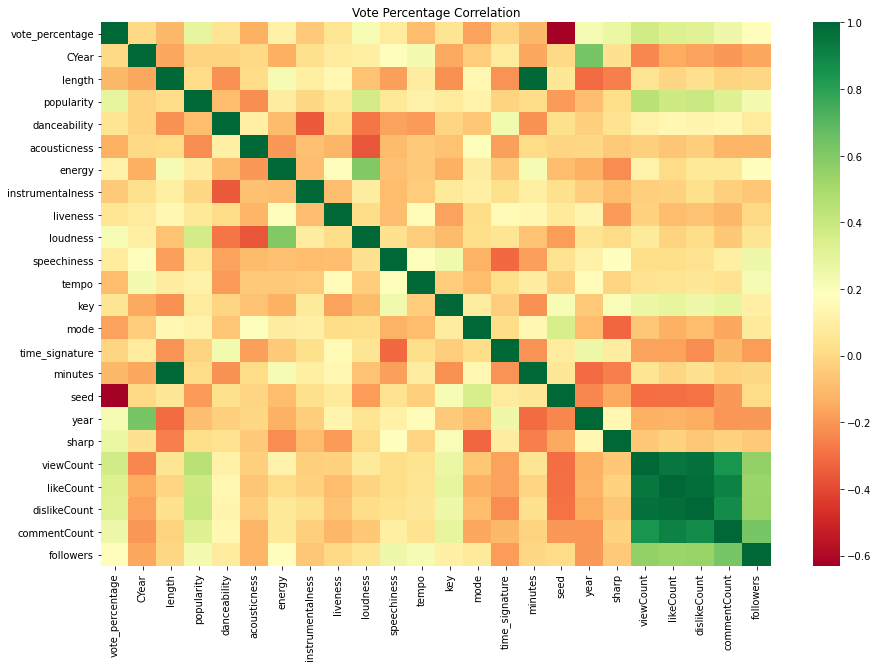

In [47]:
plt.figure(figsize = (15,10))
plt.title('Vote Percentage Correlation')
sns.heatmap(simple_regression_data.corr(), cmap="RdYlGn")

### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

linear_model_data = simple_regression_data[['seed','viewCount', 'followers', 'tempo', 'vote_percentage']]
inputs = linear_model_data.drop(columns  = ['vote_percentage'])
target = linear_model_data.vote_percentage

# training the model on the previous results 
regression = LinearRegression().fit(inputs, target)

# getting the predictions for the 2021 tournament
tournament_2021_data = training_df_21[['seed','viewCount', 'followers', 'tempo']]
predictions_2021 = regression.predict(tournament_2021_data).tolist()

# adding those predictions to the 2021 DataFrmae 
training_df_21['predicted_win_percentage'] = predictions_2021

In [49]:
# Show Regression Coefficients for Locura de Marzo Seed #, YouTube View Count, Number of Twitter Followers, and Spotify Tempo
regression.coef_

array([-2.41538888e-02,  2.97299776e-05,  2.47885954e-03, -9.49837393e-04])

## Printing out the winning songs from the tournament
In the next section, we will be implementing the pre-trained model to follow the bracket style tournament

### Round 1 

In [50]:
bracket_info = training_df_21[['Song', 'predicted_win_percentage', 'seed']]
# Ensuring that the correct matchups are being created based on the seed of the songs 
matchup_1_16 = bracket_info[(bracket_info['seed'] == 16) | (bracket_info['seed'] == 1)]
matchup_2_15 = bracket_info[(bracket_info['seed'] == 15) | (bracket_info['seed'] == 2)]
matchup_3_14 = bracket_info[(bracket_info['seed'] == 14) | (bracket_info['seed'] == 3)]
matchup_4_13 = bracket_info[(bracket_info['seed'] == 13) | (bracket_info['seed'] == 4)]
matchup_5_12 = bracket_info[(bracket_info['seed'] == 12) | (bracket_info['seed'] == 5)]
matchup_6_11 = bracket_info[(bracket_info['seed'] == 11) | (bracket_info['seed'] == 6)]
matchup_7_10 = bracket_info[(bracket_info['seed'] == 10) | (bracket_info['seed'] == 7)]
matchup_8_9  = bracket_info[(bracket_info['seed'] == 9) | (bracket_info['seed'] == 8)]
matchups = [matchup_1_16,matchup_2_15,matchup_3_14,matchup_4_13,matchup_5_12,matchup_6_11,matchup_7_10,matchup_8_9]

winning_songs1 = []
losing_songs1 = []
winning_seeds = []
losing_seeds = []
for matchup in matchups:
  song1 = matchup.iloc[0]
  song2 = matchup.iloc[1]
  if song1.predicted_win_percentage > song2.predicted_win_percentage:
    winning_song = song1.Song
    losing_song = song2.Song
    winning_songs1.append(winning_song)
    losing_songs1.append(losing_song)
    winning_seeds.append(song1.seed)
    losing_seeds.append(song2.seed)
  elif song1.predicted_win_percentage <= song2.predicted_win_percentage:
    winning_song = song2.Song
    losing_song = song1.Song
    winning_songs1.append(winning_song)
    losing_songs1.append(losing_song)
    winning_seeds.append(song2.seed)
    losing_seeds.append(song1.seed)

In [51]:
print('\t\t\t\t\t\t\tRound 1 Results')
round1_results = pd.DataFrame({'Winning Song' : winning_songs1, 'Winning Seed': winning_seeds,  'Losing Song': losing_songs1, 'Losing Seed': losing_seeds})
round1_results

							Round 1 Results


,Winning Song,Winning Seed,Losing Song,Losing Seed
0,Vida de Rico,1,Aloha,16
1,La Bella y la Bestia,2,Cun Cun Prá,15
2,Deja vu,14,Tanto,3
3,Humano,4,dos mil veinte,13
4,"Agua (with J Balvin) - Music From ""Sponge On T...",5,+ (MÁS),12
5,Pura Vida,6,Qué Tienes Tú (feat. Jesús de Reik & Mau y Ricky),11
6,Color Esperanza 2020,10,Vuela,7
7,La Lista,9,Al Aire,8


In [52]:
# creating a dictionary as a way to display the information for each song 
song_info = {}
for i in winning_songs1:
        song_info["df{0}".format(i)] = bracket_info[bracket_info['Song'] == i].values
t = []
for i in song_info.values():
    t.append(i)
new = []
for i in t:
    new.append(i[0])
round2_songs = pd.DataFrame(new, columns = bracket_info.columns)

### Round 2
Following the same process as the first round to print the results for the 2nd round, this will also be followed for the 3rd and 4th rounds as well.

In [53]:
mathcup_1_16_8_9 = round2_songs[((round2_songs['seed'] == 16) | (round2_songs['seed'] == 1)) | ((round2_songs['seed'] == 8) | (round2_songs['seed'] == 9)) ]
mathcup_5_12_13_4 = round2_songs[((round2_songs['seed'] == 5) | (round2_songs['seed'] == 12)) | ((round2_songs['seed'] == 13) | (round2_songs['seed'] == 4))]
mathcup_3_14_11_6 = round2_songs[((round2_songs['seed'] == 3) | (round2_songs['seed'] == 14)) | ((round2_songs['seed'] == 11) | (round2_songs['seed'] == 6))]
mathcup_7_10_15_2 = round2_songs[((round2_songs['seed'] == 7) | (round2_songs['seed'] == 10)) | ((round2_songs['seed'] == 15) | (round2_songs['seed'] == 2))]
# creating a list with all the matchups
round2_matchups = [mathcup_1_16_8_9, mathcup_5_12_13_4, mathcup_3_14_11_6, mathcup_7_10_15_2]

In [54]:
winning_songs2 = []
losing_songs2 = []
winning_seeds2 = []
losing_seeds2 = []
for matchup in round2_matchups:
  song1 = matchup.iloc[0]
  song2 = matchup.iloc[1]
  if song1.predicted_win_percentage > song2.predicted_win_percentage:
    winning_song = song1.Song
    losing_song = song2.Song
    winning_songs2.append(winning_song)
    losing_songs2.append(losing_song)
    winning_seeds2.append(song1.seed)
    losing_seeds2.append(song2.seed)
  elif song1.predicted_win_percentage <= song2.predicted_win_percentage:
    winning_song = song2.Song
    losing_song = song1.Song
    winning_songs2.append(winning_song)
    losing_songs2.append(losing_song)
    winning_seeds2.append(song2.seed)
    losing_seeds2.append(song1.seed)

In [55]:
print('\t\t\t\t\t\tRound 2 Results')
round2_results = pd.DataFrame({'Winning Song' : winning_songs2, 'Winning Seed': winning_seeds2,  'Losing Song': losing_songs2, 'Losing Seed': losing_seeds2})
round2_results

						Round 2 Results


,Winning Song,Winning Seed,Losing Song,Losing Seed
0,Vida de Rico,1,La Lista,9
1,"Agua (with J Balvin) - Music From ""Sponge On T...",5,Humano,4
2,Deja vu,14,Pura Vida,6
3,Color Esperanza 2020,10,La Bella y la Bestia,2


In [56]:
song_info = {}
for i in winning_songs2:
        song_info["df{0}".format(i)] = bracket_info[bracket_info['Song'] == i].values
t = []
for i in song_info.values():
    t.append(i)
new = []
for i in t:
    new.append(i[0])
round3_songs = pd.DataFrame(new, columns = bracket_info.columns)

### Round 3

In [57]:
# ensuring that the final 4 songs are matched up properly 
mathcup_topHalf = round3_songs[((round3_songs['seed'] == 16) | (round3_songs['seed'] == 1)) | ((round3_songs['seed'] == 8) | (round3_songs['seed'] == 9)) | ((round3_songs['seed'] == 5) | (round3_songs['seed'] == 12)) | ((round3_songs['seed'] == 13)| (round3_songs['seed'] == 4))]
matchup_bottomHalf = round3_songs[((round3_songs['seed'] == 3) | (round3_songs['seed'] == 14)) | ((round3_songs['seed'] == 11) | (round3_songs['seed'] == 6)) | ((round3_songs['seed'] == 15) | (round3_songs['seed'] == 2)) | ((round3_songs['seed'] == 7) | (round3_songs['seed'] == 10))]
# creating a list of all the matchups
round3_matchups = [mathcup_topHalf, matchup_bottomHalf]

In [58]:
winning_songs3 = []
losing_songs3 = []
winning_seeds3 = []
losing_seeds3 = []
for matchup in round3_matchups:
  song1 = matchup.iloc[0]
  song2 = matchup.iloc[1]
  if song1.predicted_win_percentage > song2.predicted_win_percentage:
    winning_song = song1.Song
    losing_song = song2.Song
    winning_songs3.append(winning_song)
    losing_songs3.append(losing_song)
    winning_seeds3.append(song1.seed)
    losing_seeds3.append(song2.seed)
  elif song1.predicted_win_percentage <= song2.predicted_win_percentage:
    winning_song = song2.Song
    losing_song = song1.Song
    winning_songs3.append(winning_song)
    losing_songs3.append(losing_song)
    winning_seeds3.append(song2.seed)
    losing_seeds3.append(song1.seed)

In [59]:
print('\t\t\tRound 3 Results')

round3_results = pd.DataFrame({'Winning Song' : winning_songs3, 'Winning Seed': winning_seeds3,  'Losing Song': losing_songs3, 'Losing Seed': losing_seeds3})
round3_results

			Round 3 Results


,Winning Song,Winning Seed,Losing Song,Losing Seed
0,"Agua (with J Balvin) - Music From ""Sponge On T...",5,Vida de Rico,1
1,Color Esperanza 2020,10,Deja vu,14


In [60]:
song_info = {}
for i in winning_songs3:
        song_info["df{0}".format(i)] = bracket_info[bracket_info['Song'] == i].values
t = []
for i in song_info.values():
    t.append(i)
new = []
for i in t:
    new.append(i[0])
round4_songs = pd.DataFrame(new, columns = bracket_info.columns)

### Round 4

In [61]:
song1 = round4_songs.iloc[0]
song2 = round4_songs.iloc[1]
winning_song4 = []
losing_song4 = []
winning_seed4 = []
losing_seed4 = []
if song1.predicted_win_percentage > song2.predicted_win_percentage:
  winning_song4.append(song1.Song)
  losing_song4.append(song2.Song)
  winning_seed4.append(song1.seed)
  losing_seed4.append(song2.seed)
elif song1.predicted_win_percentage <= song2.predicted_win_percentage:
  winning_song4.append(song2.song)
  losing_song4.append(song1.Song)
  winning_seed4.append(song2.seed)
  losing_seed4.append(song1.seed)

In [62]:
print('\t\t\t\t\tRound 4 Results')

round4_results = pd.DataFrame({'Winning Song' : winning_song4, 'Winning Seed': winning_seed4,  'Losing Song': losing_song4, 'Losing Seed': losing_seed4})
round4_results

					Round 4 Results


,Winning Song,Winning Seed,Losing Song,Losing Seed
0,"Agua (with J Balvin) - Music From ""Sponge On T...",5,Color Esperanza 2020,10


# Model Accuracy 
## Predicted Bracket

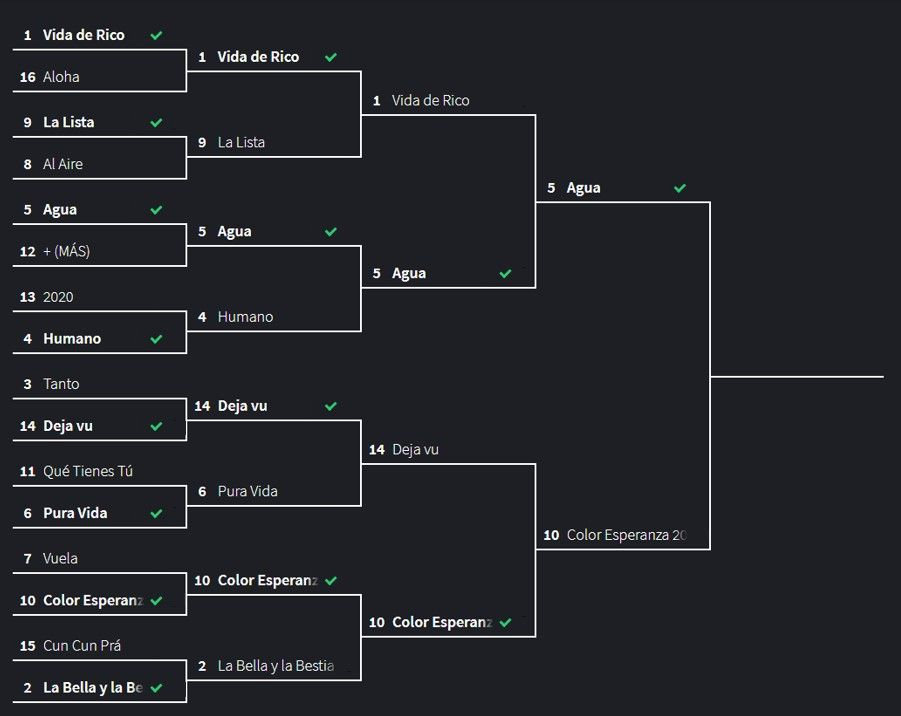

## Actual Results

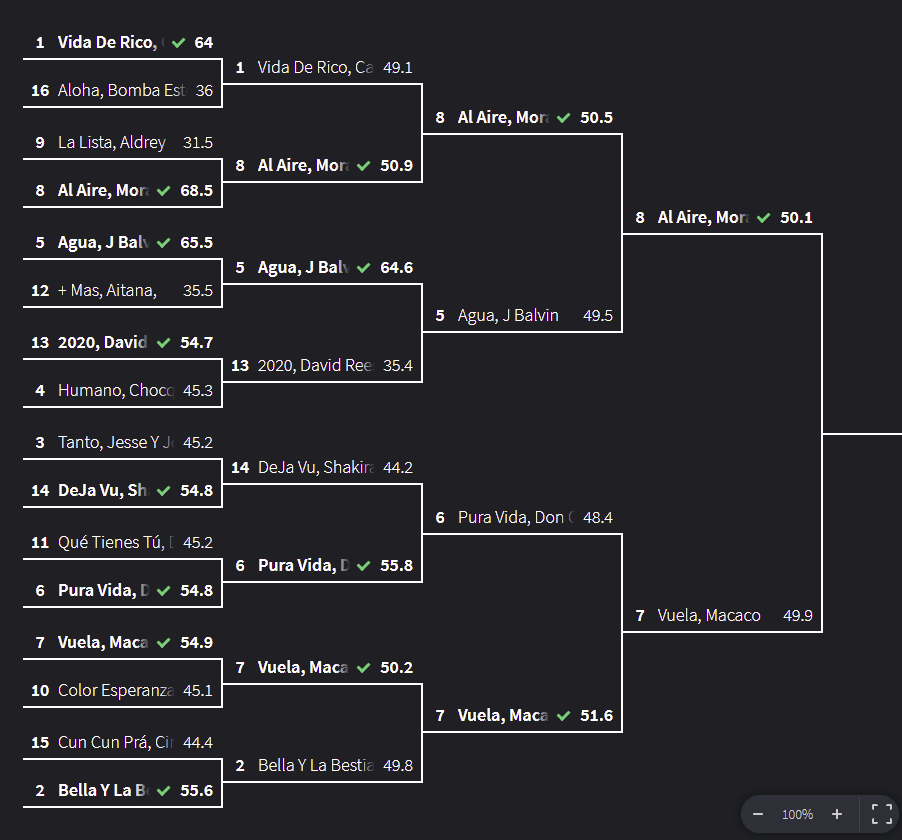